In [24]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [67]:
INTERFACE_FOLDER_URI = '../app/detectors/assets/images/dice_labels/'

BLOCK_RESOLUTION = (49,49)

def _get_img_matrices_dict(block_resolution=(49, 49)):
    image_list = os.listdir(INTERFACE_FOLDER_URI)
    
    img_matrices_dict = {}
    for image_name in image_list:
        image_path = INTERFACE_FOLDER_URI + image_name
        image = cv2.imread(image_path)
    
        image_matrix = cv2.resize(image, block_resolution)
        dict_name = image_name.rsplit('.',1)[0] 
        
        img_matrices_dict[dict_name] = image_matrix
    return img_matrices_dict    

In [68]:
img_dict = _get_img_matrices_dict()

libpng warning: Incorrect sBIT chunk length
libpng warning: Incorrect sBIT chunk length
libpng warning: Incorrect sBIT chunk length
libpng warning: Incorrect sBIT chunk length
libpng warning: Incorrect sBIT chunk length
libpng warning: Incorrect sBIT chunk length
libpng warning: Incorrect sBIT chunk length
libpng warning: Incorrect sBIT chunk length


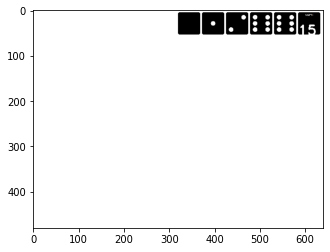

In [90]:
def _get_img_matrices_dict(block_resolution=(49, 49)):
    image_list = os.listdir(INTERFACE_FOLDER_URI)
    
    img_matrices_dict = {}
    for image_name in image_list:
        image_path = INTERFACE_FOLDER_URI + image_name
        image = cv2.imread(image_path)
    
        image_matrix = cv2.resize(image, block_resolution)
        dict_name = image_name.rsplit('.',1)[0] 
        
        img_matrices_dict[dict_name] = image_matrix
    return img_matrices_dict    

def _update_sum_img_dict(img_dict, classes):
    classes_int = [int(class_) for class_ in classes]
    sum_classes = sum(classes_int)
    
    w, h, c = img_dict["1"].shape
    
    img = img_dict["empty_sum"].copy()
    
    font                   = cv2.FONT_HERSHEY_DUPLEX
    bottomLeftCornerOfText = (0,49)
    fontScale              = 1
    fontColor              = (255,255,255)
    thickness              = 2
    lineType               = 1
    
    cv2.putText(img,f'{sum_classes}', 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        thickness,
        lineType)
    
    img_dict["sum"] = img
    return img_dict

def _fill_empty_classes(classes, desired_length = 6):
    #turn for example '['5', '3']' into '['empty','empty','empty','3','5','sum']'. 
    #Desired lenght adds to the front of the list
    empty = ['empty' for _ in range(desired_length-1-len(classes))]
    final = empty + classes + ['sum']
    return final


def _update_mask(mask, classes, img_dict, n_squares=6):
    h, w, c = mask.shape
    block_w, block_h = BLOCK_RESOLUTION
    
    distance_between_blocks = round(block_w / (n_squares * 2 + 1))
    y_coord = round(h/100)
    
    for i, image in enumerate(classes):
        x_coord = round(w/2) + ( block_w + distance_between_blocks) * i
        mask[y_coord:y_coord+block_h, x_coord:x_coord+block_w,:] = img_dict[image]
    return mask
    
    
    
def _get_interface(img_resolution, classes, img_dict, n_squares=6):
    
    if len(classes) > n_squares - 1:
        classes.sort(reverse=True)
        classes = classes[0:n_squares-1]
    classes.sort()
    
    img_dict = _update_sum_img_dict(img_dict, classes)
    full_classes = _fill_empty_classes(classes)
    
    mask = 255*np.ones((img_resolution[0], img_resolution[1], 3), dtype=np.uint8)
    mask = _update_mask(mask, full_classes, img_dict)
    return mask
    
INTERFACE_FOLDER_URI = '../app/detectors/assets/images/dice_labels/'

BLOCK_RESOLUTION = (49,49)
    
img_dict = _get_img_matrices_dict()
    
mask = _get_interface((480, 640), ["1", "2", "6", "6"], img_dict)
    
plt.imshow(mask)
    